In [16]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import cv2
import re
from matplotlib import pyplot as plt

pytesseract.get_tesseract_version()

LooseVersion ('4.0.0-beta.1')

# Superposition de cadre (textes détectés) sur l'image

In [14]:
simage = r'/home/benoit/git/python_tutos/tesseract/image_2.png'
img = cv2.imread(simage)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print (d)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 1, 2, 3, 4], 'left': [0, 469, 469, 469, 469, 621, 737, 835, 1051, 666, 666, 666, 666, 838, 934, 1172], 'top': [0, 458, 458, 458, 458, 461, 470, 458, 461, 683, 683, 683, 685, 695, 683, 686], 'width': [1920, 738, 738, 738, 122, 89, 67, 207, 156, 661, 661, 661, 142, 67, 210, 155], 'height': [1080, 60, 60, 60, 48, 45, 36, 60, 45, 48, 48, 48, 46, 36, 48, 45], 'conf': ['-1', '-1', '-1', '-1', 96, 95, 95, 96, 96, '-1', '-1', '-1', 96, 96, 96, 96], 'text': ['', '', '', '', 'Ceci', 'est', 'un', 'premier', 'test', '', '', '', 'Avec', 'un', 'second', 'texte']}


In [15]:
NbBoites = len(d['level'])
print ("Nombre de boites: " + str(NbBoites))
for i in range(NbBoites):
    # Récupère les coordonnées de chaque boite
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    # Affiche un rectangle
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Nombre de boites: 16


## Appuyez sur une touche du clavier sans quoi le kernel Jupyter sera bloqué

# Détection d'un élément particulier d'un document comme une date ou autre chose qui a un format particulier ...

In [12]:
simage = r'/home/benoit/git/python_tutos/tesseract/image_2_bis.png'
img = cv2.imread(simage)
texte = pytesseract.image_to_string(img, lang='fra')
print (texte)

ceci est une date 27/09/2018 … comment la retrouver ?


In [6]:
tTexte = texte.split()
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
for i in range(len(tTexte)):
    if re.match(date_pattern, tTexte[i]):
        dateTrouvee = tTexte[i]
        
print (dateTrouvee)

27/09/2018


## Affichage en surbrillance de la zone détectée sur l'image

In [8]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
for i in range(len(d['text'])):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, z) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + z), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

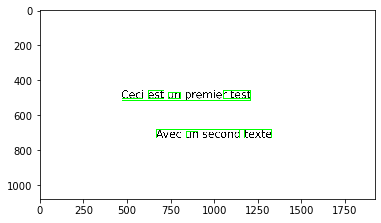

In [17]:
plt.imshow(img)

# Parametrage de tesseract

In [13]:
simage = r'/home/benoit/git/python_tutos/tesseract/image_2.png'
img = cv2.imread(simage)
custom_config = r'-c tessedit_char_whitelist=ceiomnt --psm 6'
print(pytesseract.image_to_string(img, config=custom_config))

Ceci est un premier test
Avec un second texte
